**Group Project: Phase 1**

![](https://drive.google.com/uc?id=1ohU_7BnmbhhNzCEmJygGqUx11KNxe2KN)

New York is the largest city in the United States, with an estimated 2019 population of 19.49 million. This data set comprises of the people who locally live there as well as the tourists which visit the city annually. It is a major tourist attraction with many people visiting the city from various countries like Spain, France, Russia, etc. It is a favourite vacation spot for many families. With many people also working in the city, it is always a challenge to find a suitable living space which is affordable and in suitable locality. Therefore with the available dataset and contributing analysis of the data, we will try providing cost effective locations to the clients.


**Table of contents**

•	[Importing Libraries](#Importing-Libraries)

•	[Reading the File](#Reading-the-File)

•	[Data Cleansing](#Data-Cleansing)

•	[Data Preprocessing](#Data-Preprocessing)

•	[Unique neighbourhoods](#Unique-neighbourhoods)

•	[Methods Exploration](#Methods-Exploration)

•	[Univariate Analysis](#Univariate-Analysis)

 > o	[Price In Brooklyn](#Price-In-Brooklyn)

  >o	[Price in Manhattan](#Price-in-Manhattan)

  >o	[Price in Staten](#Price-in-Staten)

 > o	[Price in Queens](#Price-in-Queens)

  >o	[Price in Bronx](#Price-in-Bronx)

  >o	[Room Type Distribution](#Room-Type-Distribution)

  >o	[Private Rooms](#Private-Rooms)

  >o	[Home or Apartment](#Home-or-Apartment)

 > o	[Shared Rooms](#Shared-Rooms)

 > o	[Ratings](#Ratings)

  >o	[Empty Rooms](#Empty-Rooms)

  >o	[Period spent in a Room](#Period-spent-in-a-Room)

 > >	[Private room time:](#Private-room-time:)

  > >	[Shared room time:](#Shared-room-time:)

  > >	[Home or Apartment time:](#Home-or-Apartment-time:)

•	[Bivariate Analysis](#Bivariate-Analysis)

 > o	[Groups](#Groups)

> > 	[Top 20 Hosts](#Top-20-Hosts)

 > o	[Availability](#Availability)

•	[Linear Regression](#Linear-Regression)

•	[Conclusion](#Conclusion)

•	[Pipeline](#Pipeline)

  >o	[Model 1](#Model-1)

 > >  [Generate test prediction for model 1](#Generate-test-prediction-for-model-1)

  >o	[Model 2](#Model-2)

 > >  [Generate test prediction for model 2](#Generate-test-prediction-for-model-2)

  >o	[Model 3](#Model-3)

 > >  [Generate test prediction for model 3](#Generate-test-prediction-for-model-3)
 

#Importing Libraries

In [0]:
import numpy as np
import seaborn as sns
import pandas as pd 
import matplotlib.pyplot as plt

In [5]:
#Mounting the google drive 
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Reading the File

In [9]:
df = pd.read_csv("/content/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


Configuring Types of Attributes:-

In [10]:
df.room_type.unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

This shows there are three types of rooms :-

1. Private Room
2. Entire home/apt
3. Shared room

Attribute room_type is nominal in its nature. Since it is categorical 

**Identifying the types of Attributes in the Data:-**

There are 16 attributes in the data, namely:-

1. id : Discrete - Numeric Attribute	
2. name : Nominal Attribute 
3. host_id : Discrete-Numeric	Attribute
4. host_name : Nominal Attribute 	
5. neighbourhood_group : Nominal Attribute	
6. neighbourhood : Nominal Attribute
7. latitude : Interval-Scaled Numeric	Attribute
8. longitude : Interval-Scaled Numeric Attribute
9. room_type : Nominal Attribute	
10. price : Discrete-Numeric Attribute	
11. minimum_nights : Discrete-Numeric Attribute	
12. number_of_reviews : Discrete-Numeric Attribute	
13. last_review : Date-Time Attribute  	
14. reviews_per_month : Discrete-Numeric Attribute	
15. calculated_host_listings_count : Discrete-Numeric	Attribute
16. availability_365 : Discrete-Numeric Attribute
---






In [11]:
df.minimum_nights.unique()

array([   1,    3,   10,   45,    2,    5,    4,   90,    7,   14,   60,
         29,   30,  180,    9,   31,    6,   15,    8,   26,   28,  200,
         50,   17,   21,   11,   25,   13,   35,   27,   18,   20,   40,
         44,   65,   55,  120,  365,  122,   19,  240,   88,  115,  150,
        370,   16,   80,  181,  265,  300,   59,  185,  360,   56,   12,
         70,   39,   24,   32, 1000,  110,  270,   22,   75,  250,   62,
         23, 1250,  364,   74,  198,  100,  500,   43,   91,  480,   53,
         99,  160,   47,  999,  186,  366,   68,   93,   87,  183,  299,
        175,   98,  133,  354,   42,   33,   37,  225,  400,  105,  184,
        153,  134,  222,   58,  210,  275,  182,  114,   85,   36])

The data above states that the attribute 'minimum-nights' range from 1-1250 nights. Which means that the lowest value for minimum night to stay is mentioned as one(1) and the maximum value is 1250 nights(3 years approx).

#Data Cleansing 

Checking For Mising values, If Any :-

In [12]:
df.shape

(48895, 16)

The code above provides us with the total number of rows filled as 48895 and the total number of columns per row are 16, which are also known as the attributes for the data.

In [13]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The data above helps us deduct the number of missing values for each attribute.

Number of values missing per attribute:


1. Name(name): There are in total 16 missing values.
2. Host Name(host_name): There are 21 missing values.
3. Last Review(last_review): There are 10052 missing-review dates.
4. Review Per Month(reviews_per_month) : There are 10052 missing values.



In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
id                                48895 non-null int64
name                              48879 non-null object
host_id                           48895 non-null int64
host_name                         48874 non-null object
neighbourhood_group               48895 non-null object
neighbourhood                     48895 non-null object
latitude                          48895 non-null float64
longitude                         48895 non-null float64
room_type                         48895 non-null object
price                             48895 non-null int64
minimum_nights                    48895 non-null int64
number_of_reviews                 48895 non-null int64
last_review                       38843 non-null object
reviews_per_month                 38843 non-null float64
calculated_host_listings_count    48895 non-null int64
availability_365                  48895 non-null int64

***Apparently out of 16 attributes, there are 12 attributes with complete and accurate data. There are 4 attributes that require data cleaning.***

Accurate-Consistent Data Attributes:-
1. id 	
2. host_id 
3. neighbourhood_group  	
4. neighbourhood 
5. latitude
6. longitude 
7. room_type 	
8. price 	
9. minimum_nights 
10. number_of_reviews 	
11. last_review   	
12. reviews_per_month 
13. calculated_host_listings_count 	
14. availability_365 

Inconsistent Set of Data Which Requires Processing:-
1. name : Nominal Attribute 
2. host_name : Nominal Attribute
3. last_review : Date-Time  	
4. reviews_per_month : Discrete- Numeric	

After doing the basic analysis, we can conclude that there is a need to check-up for getting the details of the missing names as well as host_names. For this, we may need to make phone calls or personally visit the addressed locations with the missing name-details. 

In [15]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


#Data Preprocessing

Inserting values for the null characters or spaces.

In [0]:
#Filling in 'zero'(0), where the reviews are missing.
df['reviews_per_month'].fillna(0,inplace = True)

In [0]:
#Filling in current date, where the date of last review is missing.
df['last_review'].fillna(2/4/2020,inplace = True)

The above codes help in filling in the missing values in column:
1. Zero(0) in 'reviews_per_month'
2. Current date in 'last_review'

In [18]:
#hosts-IDs with majority of  house listings 
Top10_Host=df.host_id.value_counts().head(10)
Top10_Host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [19]:
#Confirming the max number of house listings according to the hosts(calculated_host_listings_count) mentioned in the dataset.
Tophost_listings_count=df.calculated_host_listings_count.max()
Tophost_listings_count



327

In [20]:
#Lowest number of house listings according to hosts.
Lowesthost_listings_count=df.calculated_host_listings_count.min()
Lowesthost_listings_count

1

From the result above, we can deduct the hosts with maximum house listings are:-
1. ID.219517861 with 327 house listings.( 1rst Highest Rank)
2. ID.107434423 with 232 house listings.( 2nd Highest Rank)
3. ID.30283594  with 121 house listings.( 3rd Highest Rank)

There are other id's with house listings comparatively low in number than the ones listed above.


Editing for right formations

In [0]:
#Filling in missing values in the respective columns- 'name' & 'host_name' with 'Unknown' and 'Anounymouse respectively.
df['name'].fillna("Unknown",inplace=True)
df['host_name'].fillna("Anounymous",inplace=True)

Due to the amount of missing data in the column 'Last review' it will be elminiated.

In [0]:
from sklearn import preprocessing

In [23]:
dataf=df.drop(['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','last_review'],axis=1)
dataf.head(10)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,0.00,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129
6,40.68688,-73.95596,60,45,49,0.40,1,0
7,40.76489,-73.98493,79,2,430,3.47,1,220
8,40.80178,-73.96723,79,2,118,0.99,1,0
9,40.71344,-73.99037,150,1,160,1.33,4,188


In [24]:
#Normalization of Data from 0-1
dataf=((dataf-dataf.min())/(dataf.max()-dataf.min()))*1
dataf.sample(10)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
19361,0.685871,0.551211,0.0125,0.003203,0.001590,0.000855,0.00000,0.000000
23911,0.866068,0.631184,0.0040,0.001601,0.049285,0.021538,0.01227,0.991781
10583,0.632710,0.475340,0.0245,0.002402,0.087440,0.022051,0.00000,0.715068
24713,0.676265,0.555558,0.0140,0.004804,0.004769,0.002222,0.00000,0.000000
40653,0.609408,0.496773,0.0600,0.004804,0.000000,0.000000,0.00000,0.769863
33025,0.505215,0.546902,0.0070,0.001601,0.066773,0.058291,0.00000,0.054795
16420,0.555254,0.480345,0.0099,0.000000,0.000000,0.000000,0.00000,0.000000
15846,0.850969,0.580020,0.0055,0.001601,0.007949,0.002393,0.00000,0.000000
4254,0.639800,0.476243,0.0189,0.001601,0.001590,0.000342,0.00000,0.000000
1982,0.465289,0.525318,0.0185,0.002402,0.012719,0.003761,0.00000,0.021918


Standardization of Data with Z-Score:-

In [0]:
from scipy.stats import zscore

In [26]:
dataz=df.drop(['id','name','host_id','host_name','neighbourhood_group','neighbourhood','room_type','last_review'],axis=1)
dataz.head(10)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,0.00,1,365
3,40.68514,-73.95976,89,1,270,4.64,1,194
4,40.79851,-73.94399,80,10,9,0.10,1,0
5,40.74767,-73.97500,200,3,74,0.59,1,129
6,40.68688,-73.95596,60,45,49,0.40,1,0
7,40.76489,-73.98493,79,2,430,3.47,1,220
8,40.80178,-73.96723,79,2,118,0.99,1,0
9,40.71344,-73.99037,150,1,160,1.33,4,188


In [0]:
dataz_zscore = (dataz - dataz.mean())/dataz.std()

In [28]:
dataz_zscore

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,-1.493834,-0.437648,-0.015493,-0.293993,-0.320410,-0.551505,-0.034716,1.916231
1,0.452431,-0.684632,0.300970,-0.293993,0.487660,-0.445075,-0.156103,1.840256
2,1.468384,0.222494,-0.011329,-0.196482,-0.522428,-0.682979,-0.186450,1.916231
3,-0.803389,-0.164448,-0.265332,-0.293993,5.538099,2.221955,-0.186450,0.617059
4,1.275647,0.177214,-0.302808,0.144805,-0.320410,-0.620372,-0.186450,-0.856856
...,...,...,...,...,...,...,...,...
48890,-0.924607,0.048089,-0.344448,-0.245238,-0.522428,-0.682979,-0.156103,-0.788478
48891,-0.497136,0.411633,-0.469368,-0.147727,-0.522428,-0.682979,-0.156103,-0.583346
48892,1.573464,0.075820,-0.157069,0.144805,-0.522428,-0.682979,-0.186450,-0.651723
48893,0.523768,-0.843872,-0.406908,-0.293993,-0.522428,-0.682979,-0.034716,-0.841661


#Unique neighbourhoods

There are different areas in New York. To represent this, the categories provided will be used.

In [29]:
df.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

This shows us that there are house listings from the five Boroughs of New York namely:-
1. Brooklyn
2. Manhattan
3. Queens
4. Staten Island
5. Bronx

In [30]:
#Neighbourhood in 5 Boroughs
df.neighbourhood.unique()

array(['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem',
       'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen",
       'Upper West Side', 'Chinatown', 'South Slope', 'West Village',
       'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights',
       'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village',
       'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side',
       'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay',
       'SoHo', 'Upper East Side', 'Prospect Heights',
       'Washington Heights', 'Woodside', 'Brooklyn Heights',
       'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill',
       'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George',
       'Highbridge', 'Financial District', 'Ridgewood',
       'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo',
       'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island',
       'Greenwich Village', 'Little Italy', 'East Flatbush',
       'Tompkinsville', 'Asto

In [31]:
#Calculating top 10 neighbourhoods with maximum number of house listings.
df.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

#Methods Exploration

Several methods will be explored and tested to conclude which method best applies in this case.







> Analysis List:
*   Univariate
*   Bivariate
*   Linear Regression














#Univariate Analysis

Area

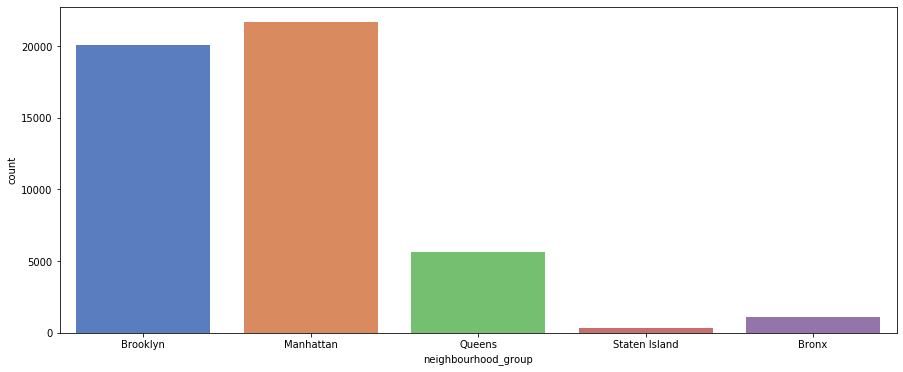

In [32]:
f,ax = plt.subplots(figsize=(15,6))
ax = sns.countplot(df.neighbourhood_group,palette="muted")
plt.show()

From the data above, we conclude that there is more house vacancies in Brooklyn and Manhattan in comparison to the other three Boroughs.

##Price In Brooklyn

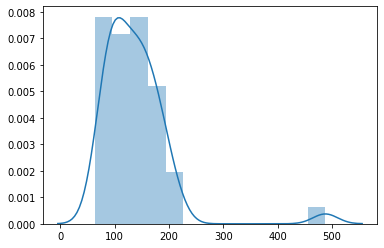

In [33]:
df1 = df[df.neighbourhood_group == "Brooklyn"][["neighbourhood","price"]]
d = df1.groupby("neighbourhood").mean()
sns.distplot(d)
plt.show()

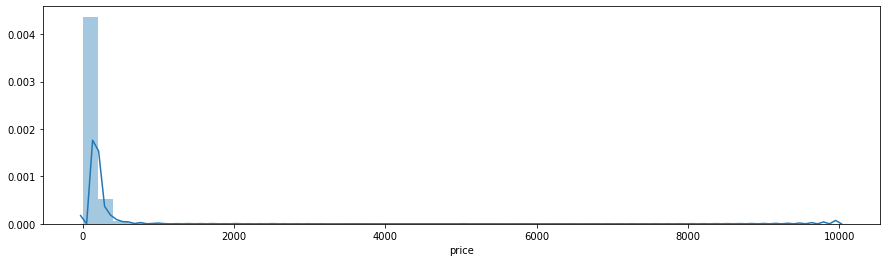

In [34]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Brooklyn"]['price']
sns.distplot(df1)
plt.show()

##Price in Manhattan

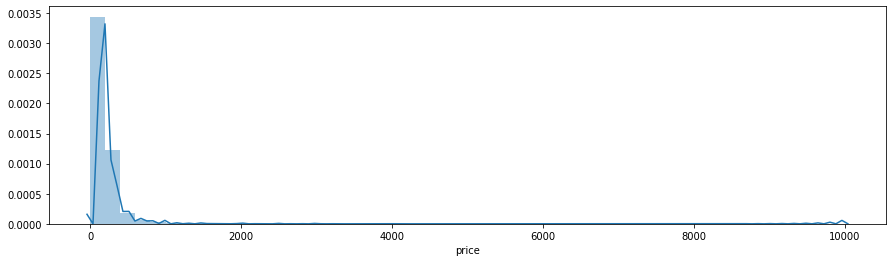

In [35]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Manhattan"]['price']
sns.distplot(df1)
plt.show()

##Price in Staten

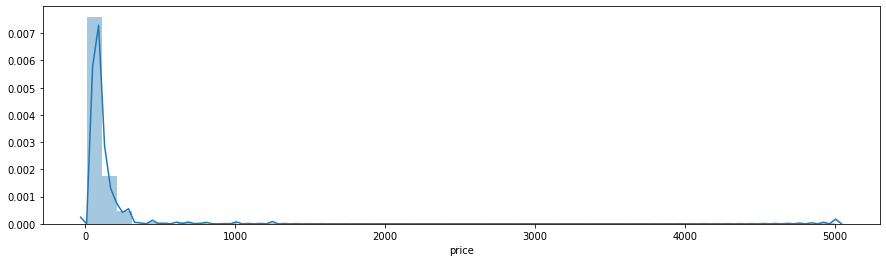

In [36]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Staten Island"]['price']
sns.distplot(df1)
plt.show()

##Price in Queens

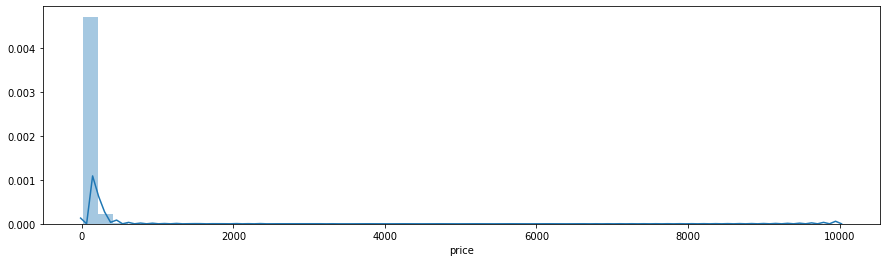

In [37]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Queens"]['price']
sns.distplot(df1)
plt.show()

##Price in Bronx

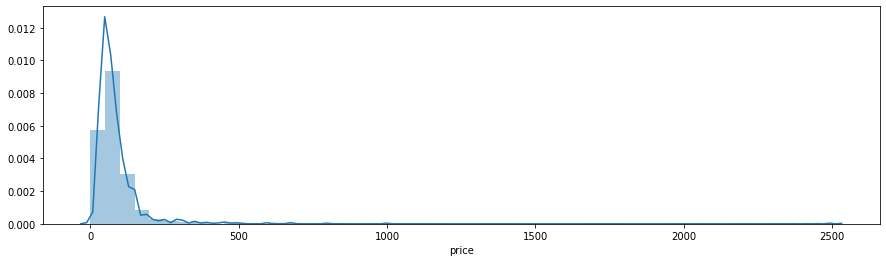

In [38]:
f,ax = plt.subplots(figsize=(15,4))
df1 = df[df.neighbourhood_group=="Bronx"]['price']
sns.distplot(df1)
plt.show()

##Room Type Distribution

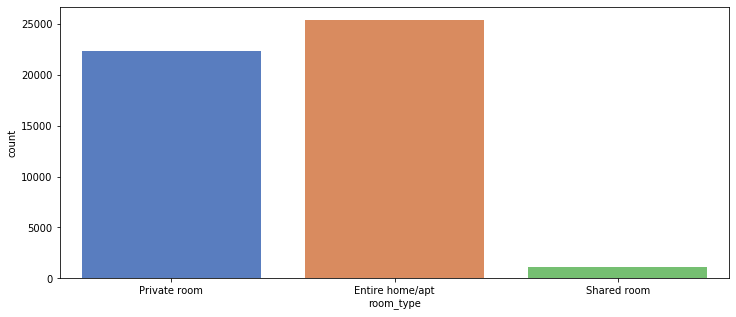

In [39]:
f,ax = plt.subplots(figsize=(12,5))
ax = sns.countplot(df.room_type,palette="muted")
plt.show()

We conclude from the graph displayed above, that the availability of Entire home is more in comparison to Private rooms and shared rooms. Further, the availability of private rooms is more than the shared rooms. Therefore, we can say there are only few number of shared rooms available for renting services.

##Private Rooms

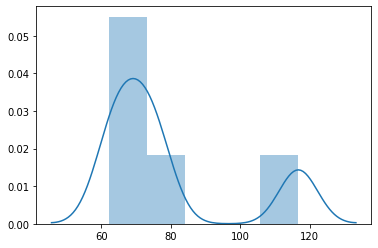

In [40]:
df1 = df[df.room_type == "Private room"][["neighbourhood_group","price"]]
d = df1.groupby("neighbourhood_group").mean()
sns.distplot(d)
plt.show()

##Home or Apartment

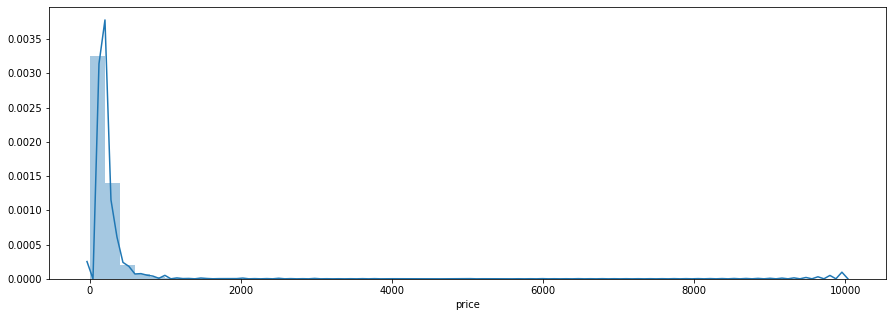

In [41]:
df1 = df[df.room_type=='Entire home/apt']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

##Shared Rooms

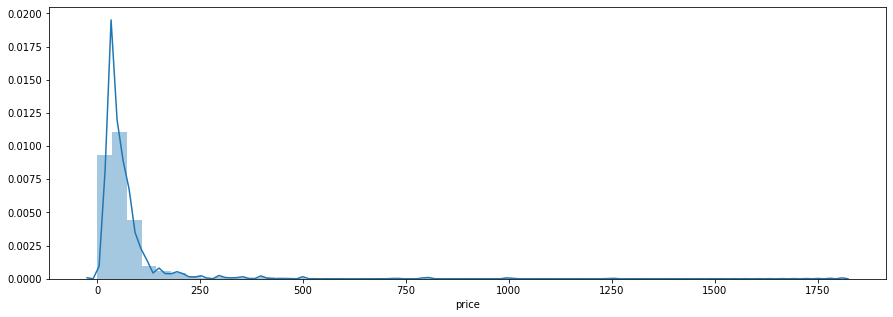

In [42]:
df1 = df[df.room_type=='Shared room']['price']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df1)
plt.show()

##Ratings

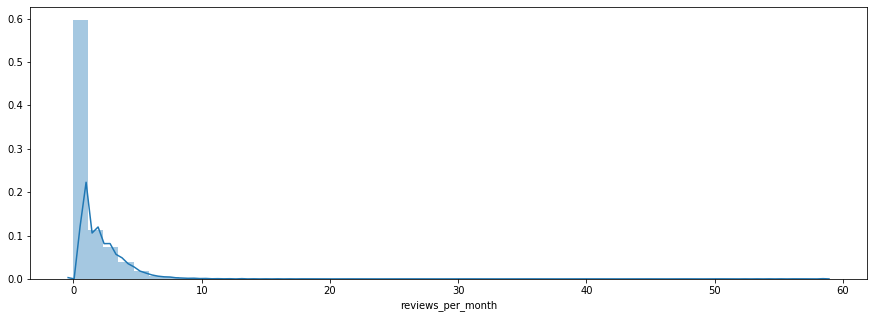

In [43]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df.reviews_per_month)
plt.show()

##Empty Rooms

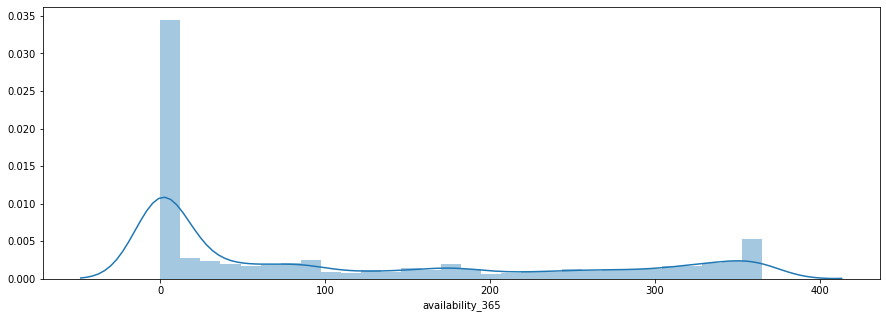

In [44]:
f,ax = plt.subplots(figsize=(15,5))
ax = sns.distplot(df.availability_365)
plt.show()

##Period spent in a Room

###Private room time:

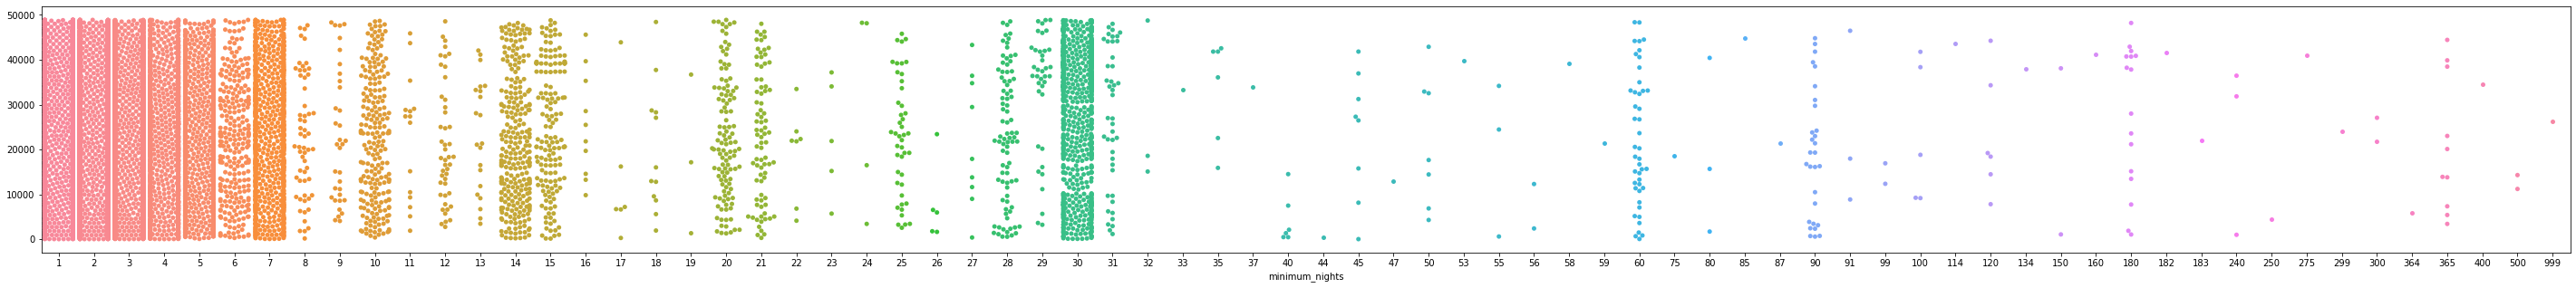

In [45]:
df1 = df[df.room_type=="Private room"]['minimum_nights']
f,ax = plt.subplots(figsize=(50,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

###Shared room time:

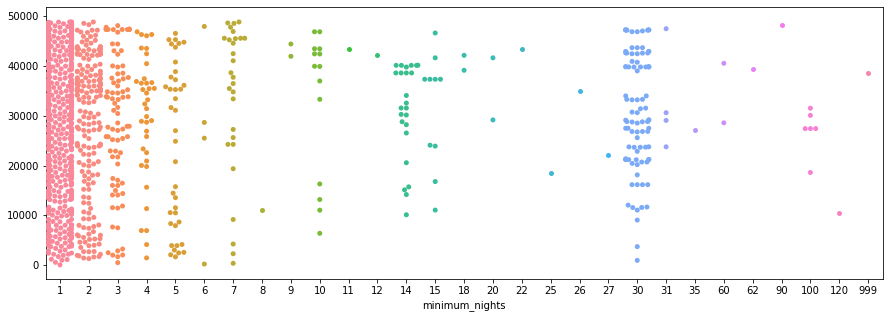

In [46]:
df1 = df[df.room_type=="Shared room"]['minimum_nights']
f,ax = plt.subplots(figsize=(15,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

###Home or Apartment time:

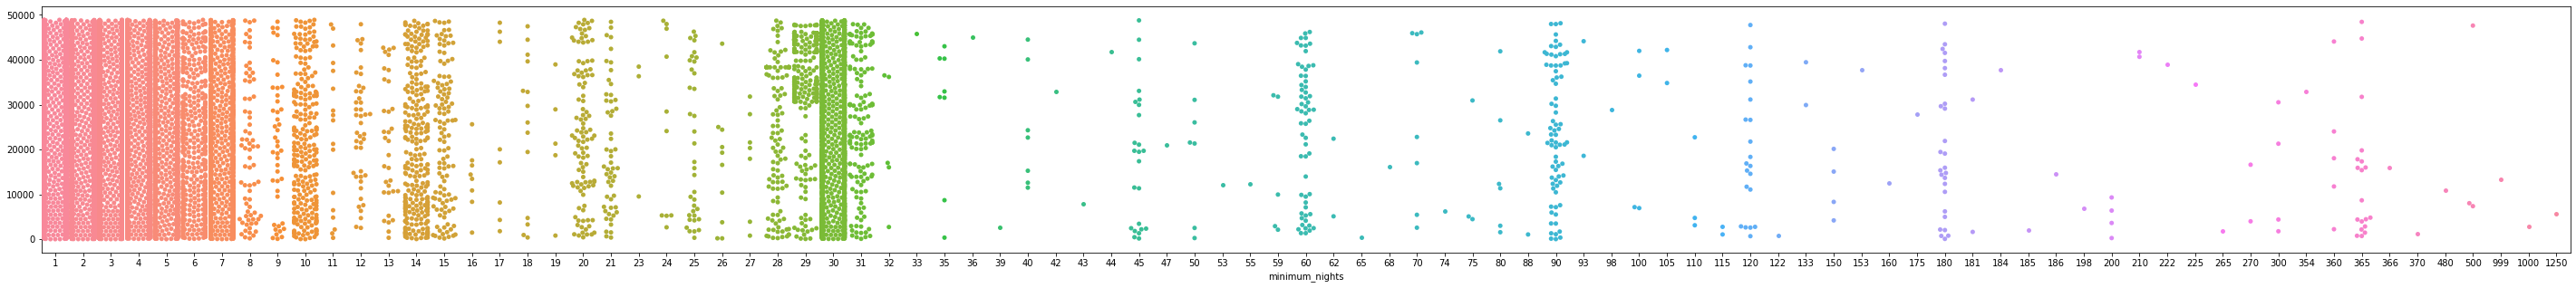

In [47]:
df1 = df[df.room_type=="Entire home/apt"]['minimum_nights']
f,ax = plt.subplots(figsize=(50,5))
ax = sns.swarmplot(y= df1.index,x= df1.values)
plt.xlabel("minimum_nights")
plt.show()

#Bivariate Analysis

##Groups 

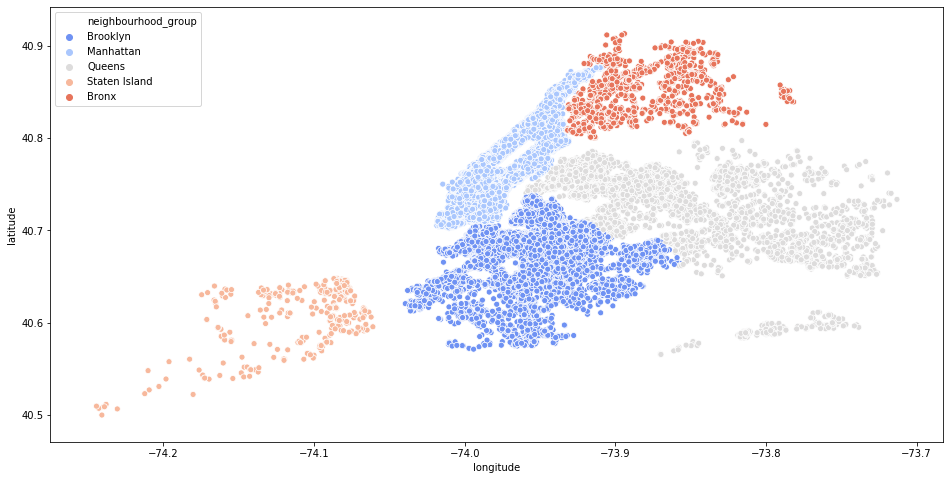

In [48]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.neighbourhood_group,palette="coolwarm")
plt.show()

###Top 20 Hosts

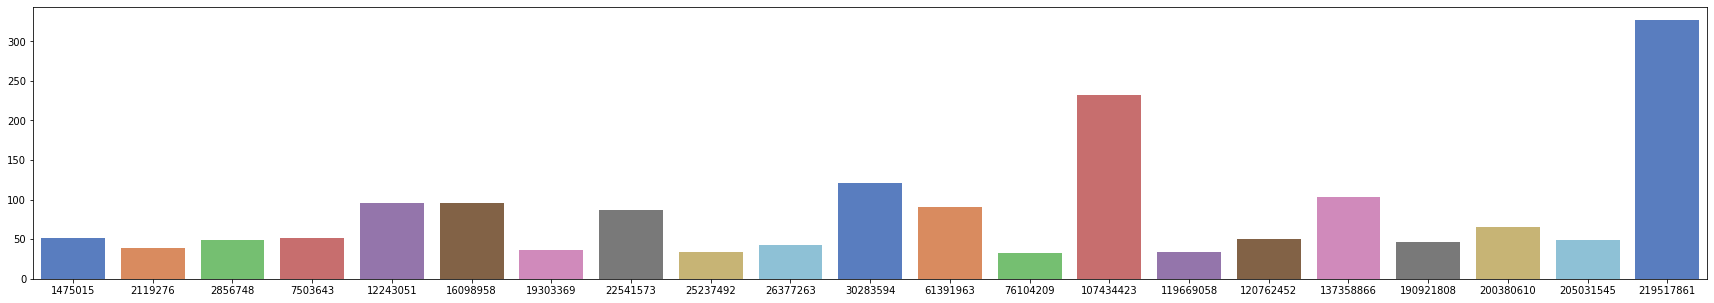

In [49]:
df1 = df.host_id.value_counts()[:21]
f,ax = plt.subplots(figsize=(30,5))
ax = sns.barplot(x = df1.index,y=df1.values,palette="muted")
plt.show()

The above graph displays the house-listing count of various hosts. From the graph it is clear that host_id.219517861 has the highest house listings provided amongst all hosts.

##Availability

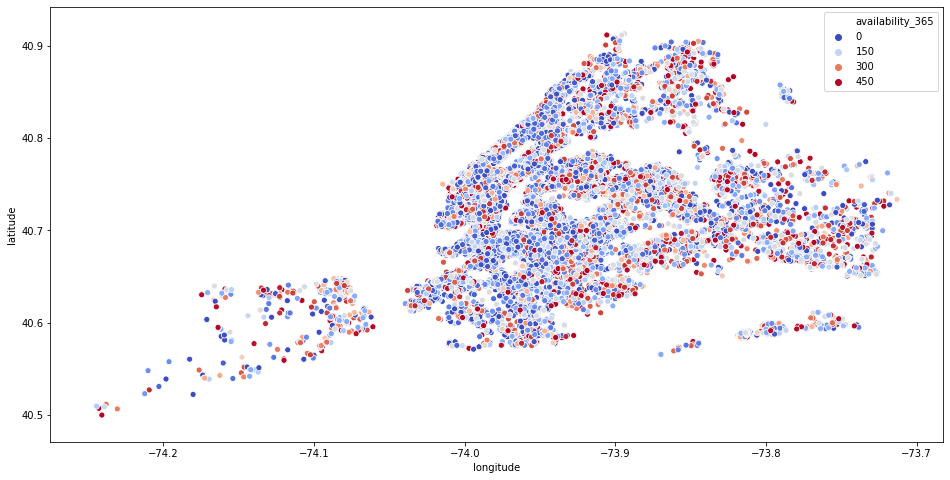

In [50]:
f,ax = plt.subplots(figsize=(16,8))
ax = sns.scatterplot(y=df.latitude,x=df.longitude,hue=df.availability_365,palette="coolwarm")
plt.show()

**Work**

In [0]:
from wordcloud import WordCloud

Creating a worldcloud.

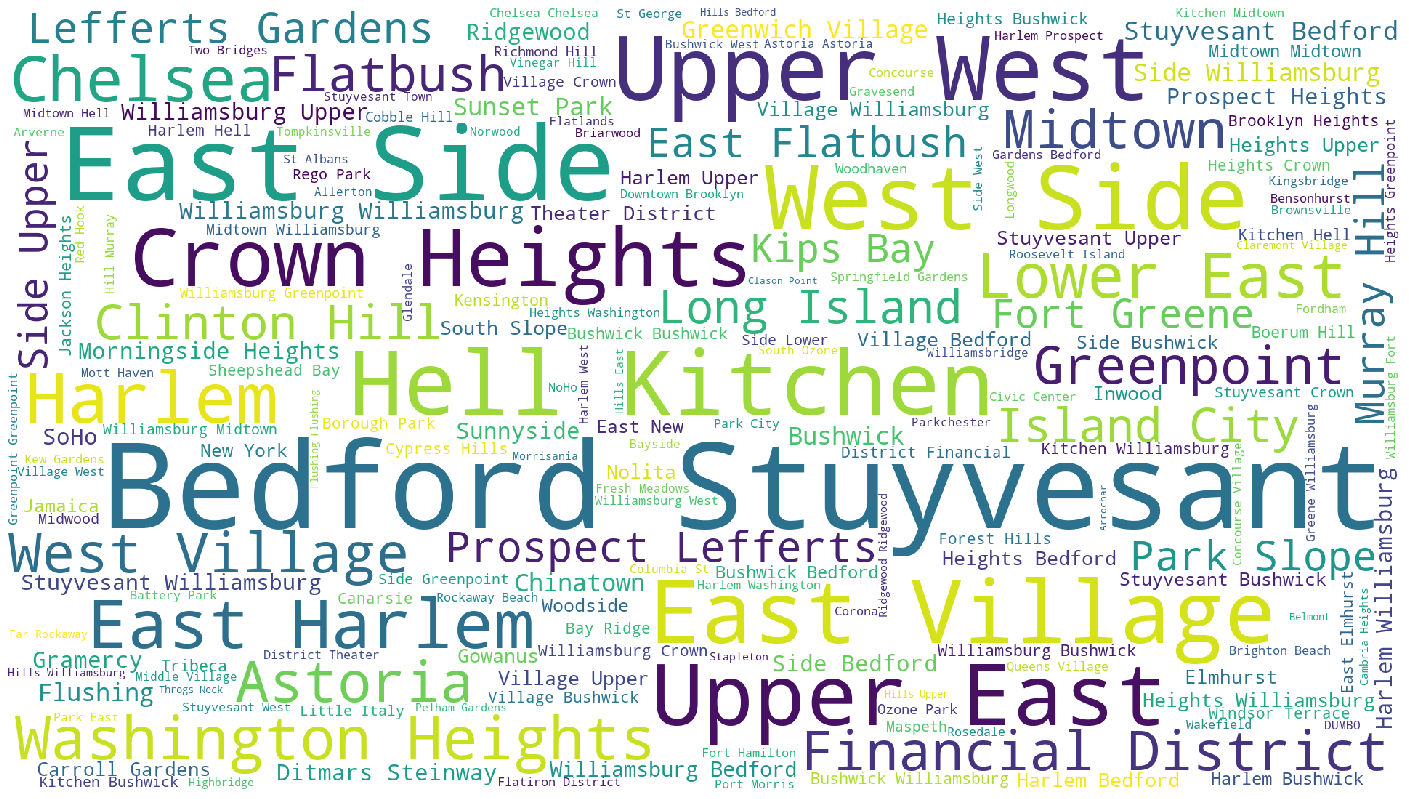

In [52]:
plt.subplots(figsize=(25,15))
wordcloud = WordCloud(
                          background_color='white',
                          width=1920,
                          height=1080
                         ).generate(" ".join(df.neighbourhood))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('neighbourhood.png')
plt.show()

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

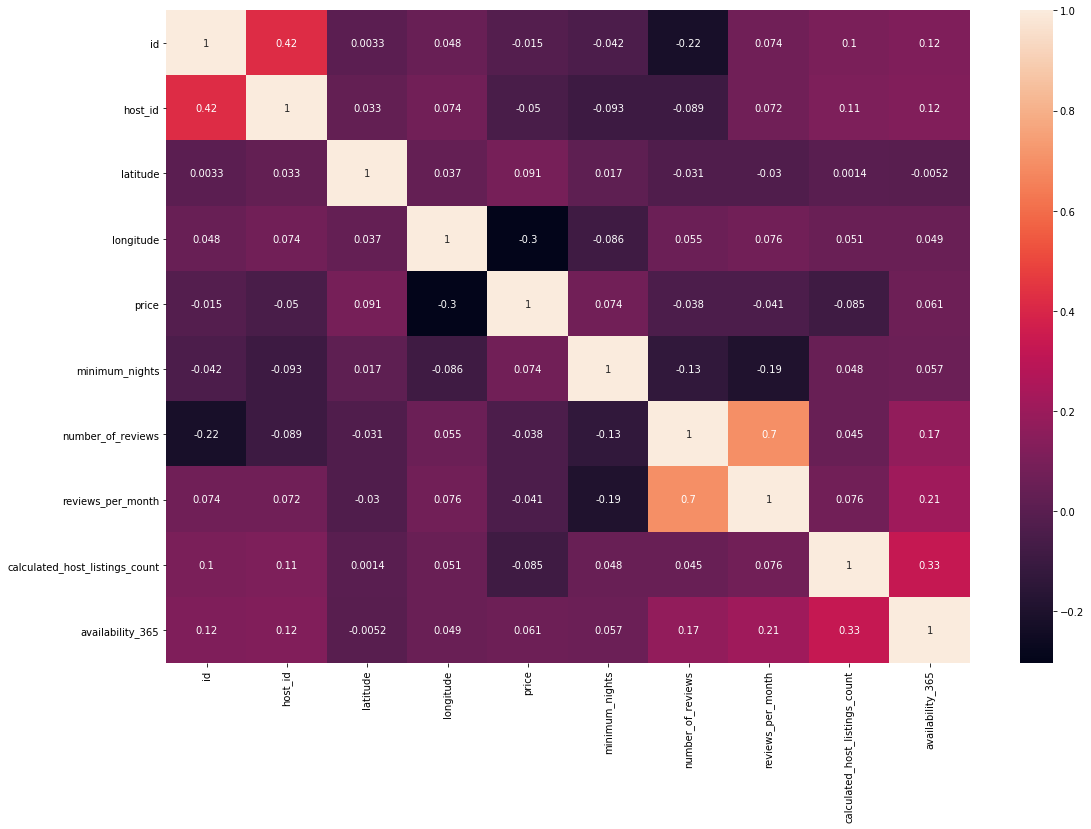

In [53]:
#Get Correlation between different variables
corr = df.corr(method='kendall')
plt.figure(figsize=(18,12))
sns.heatmap(corr, annot=True)
df.columns



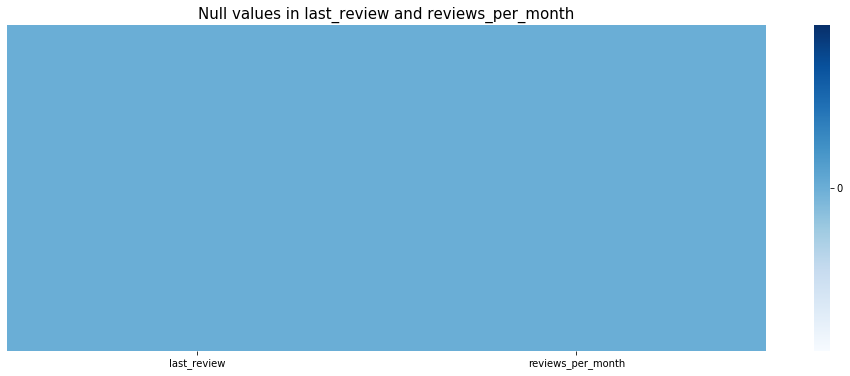

In [54]:
fig, ax = plt.subplots(figsize=(17,6))
plt.title('Null values in last_review and reviews_per_month', fontsize=15)
sns.heatmap(df[['last_review','reviews_per_month' ]].isnull(), cmap="Blues", yticklabels=False, ax=ax, cbar_kws={'ticks': [0, 1]})

# Linear Regression 

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
x= df.price.values.reshape(-1,1)
y=df.minimum_nights.values.reshape(-1,1)

lr = LinearRegression()
lr.fit(x,y)
y_pred = lr.predict(x)


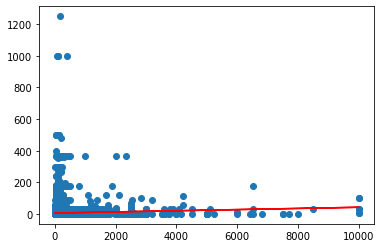

In [57]:
plt.scatter(x,y)
plt.plot(x, y_pred, color='red')
plt.show()

The aboove graph is a linear regression graph of **price vs minimum_nights**.

In [0]:
a= df.price.values.reshape(-1,1)
b=df.availability_365.values.reshape(-1,1)

l = LinearRegression()
l.fit(x,y)
b_pred = lr.predict(a)

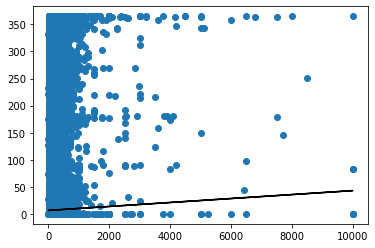

In [59]:
plt.scatter(a,b)
plt.plot(a, b_pred, color='black')
plt.show()

The aboove graph is a linear regression graph of **price vs availability_365**.

#Conclusion

In conclusion, bivariate method is the best representatoon of the data due to the representation of groups and neighbourhood in an enhanced way. The linear graph cannot provide clear analysis about the data. 

# Pipeline

**Pipelines** are made to improve the efficiency of your machine learning code.

Loading the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

In [60]:
df.drop(['last_review'],axis=1,inplace=True)
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
X_full = df.copy()
X_test_full = df.copy()


# Remove rows with missing target, separate target from predictors
X_full.dropna(axis=0, subset=['price'], inplace=True)
y = X_full.price
X_full.drop(['price'], axis=1, inplace=True)

# Break off validation set from training data
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X_full, y, 
                                                                train_size=0.8, test_size=0.2,
                                                                random_state=0)

# "Cardinality" means the number of unique values in a column
# Select categorical columns with relatively low cardinality (convenient but arbitrary)
categorical_cols = [cname for cname in X_train_full.columns if
                    X_train_full[cname].nunique() < 10 and 
                    X_train_full[cname].dtype == "object"]

# Select numerical columns
numerical_cols = [cname for cname in X_train_full.columns if 
                X_train_full[cname].dtype in ['int64', 'float64']]

# Keep selected columns only
my_cols = categorical_cols + numerical_cols
X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()
X_test = X_test_full[my_cols].copy()

In [62]:
X_train.head()

,neighbourhood_group,room_type,id,host_id,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
5374,Manhattan,Private room,3882682,194994,40.81419,-73.94717,4,27,0.46,1,196
37922,Bronx,Private room,29991534,179416315,40.87064,-73.87970,1,9,1.19,2,310
18450,Manhattan,Entire home/apt,14519882,70060476,40.76328,-73.99280,60,28,0.82,1,343
2201,Manhattan,Private room,1029482,5664550,40.72346,-73.97907,5,35,0.46,1,320
14716,Manhattan,Entire home/apt,11635717,61382075,40.84326,-73.93901,14,1,0.03,2,0


##Model 1

The next cell is to preprocess the data and train a model. 

In [63]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
model = RandomForestRegressor(n_estimators=100, random_state=0)


# Bundle preprocessing and modeling code in a pipeline
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', model)
                     ])

# Preprocessing of training data, fit model 
final_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = final_pipeline.predict(X_valid)


score = mean_absolute_error(y_valid, preds)
print('MAE:', score)



MAE: 65.64949790367113


###Generate test prediction for model 1

In [0]:
preds_test = final_pipeline.predict(X_test)

In [0]:
prediction_results = pd.DataFrame({'Id': X_test.index, 'RentPrice': preds_test})

In [66]:
prediction_results.head(10)

,Id,RentPrice
0,0,157.55
1,1,287.69
2,2,183.89
3,3,179.76
4,4,110.43
5,5,209.46
6,6,81.97
7,7,92.20
8,8,89.86
9,9,196.86


The model plot

Text(0, 0.5, 'Predictions')

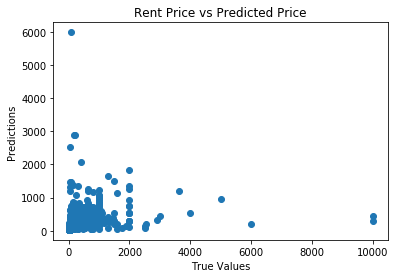

In [67]:
plt.scatter(y_valid, preds)
plt.title("Rent Price vs Predicted Price")
plt.xlabel('True Values')
plt.ylabel('Predictions')

##Model 2

The next cell is to preprocess the data and train a model. 

In [70]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
mode2 = DecisionTreeRegressor(random_state=0)


# Bundle preprocessing and modeling code in a pipeline
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', mode2)
                     ])

# Preprocessing of training data, fit model 
final_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = final_pipeline.predict(X_valid)


score = mean_absolute_error(y_valid, preds)
print('MAE:', score)



MAE: 87.29236118212496


###Generate test prediction for model 2

In [0]:
preds_test = final_pipeline.predict(X_test)

In [0]:
prediction_results = pd.DataFrame({'Id': X_test.index, 'RentPrice': preds_test})

In [73]:
prediction_results.head(10)

,Id,RentPrice
0,0,149.0
1,1,225.0
2,2,150.0
3,3,349.0
4,4,80.0
5,5,200.0
6,6,110.0
7,7,79.0
8,8,79.0
9,9,150.0


The model plot

Text(0, 0.5, 'Predictions')

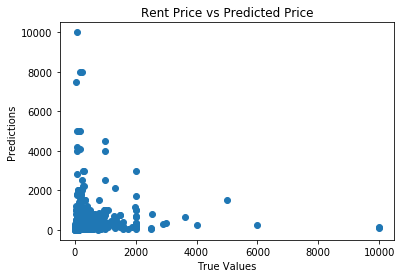

In [74]:
plt.scatter(y_valid, preds)
plt.title("Rent Price vs Predicted Price")
plt.xlabel('True Values')
plt.ylabel('Predictions')

##Model 3

The next cell is to preprocess the data and train a model. 

In [0]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Define model
mode3 = GradientBoostingRegressor(n_estimators=100, random_state=0)


# Bundle preprocessing and modeling code in a pipeline
final_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                      ('model', mode3)
                     ])

# Preprocessing of training data, fit model 
final_pipeline.fit(X_train, y_train)

# Preprocessing of validation data, get predictions
preds = final_pipeline.predict(X_valid)


score = mean_absolute_error(y_valid, preds)
print('MAE:', score)



MAE: 67.34878717354859


###Generate test prediction for model 3



In [0]:
preds_test = final_pipeline.predict(X_test)

In [0]:
prediction_results = pd.DataFrame({'Id': X_test.index, 'RentPrice': preds_test})

In [0]:
prediction_results.head(10)

,Id,RentPrice
0,0,144.693950
1,1,326.647691
2,2,184.975976
3,3,181.942206
4,4,140.608638
5,5,248.218330
6,6,60.267910
7,7,131.341699
8,8,103.584611
9,9,251.826754


The model plot

Text(0, 0.5, 'Predictions')

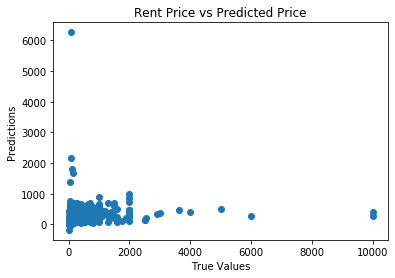

In [0]:
plt.scatter(y_valid, preds)
plt.title("Rent Price vs Predicted Price")
plt.xlabel('True Values')
plt.ylabel('Predictions')